In [6]:
import os
import numpy as np
import pandas as pd 
#import modin.pandas as pd
from tqdm import tqdm
import re
import datetime
from p_tqdm import p_map
from functools import partial
import gc

In [7]:
time_resolution = '1'
lk_path = '/mnt/data0/lkyin/'
c_path = '../network_data'+str(time_resolution)+'/commits/'
e_path = '../network_data'+str(time_resolution)+'/emails/'
mix_path = '../network_data'+str(time_resolution)+'/mix/'

In [8]:
# ------------------- processing emails ---------------------- 
print('reading emails...')
df = pd.read_csv(lk_path+'emails_final.csv')

reading emails...


/home/orzwang/.pyenv/versions/3.8.10/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,8,9,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
df.head()

,project_name,list_name,date,month,message_id,sender_name,references,sender_email,in_reply_to,cc_list,receiver_email,subject,body,from_commit,author_full_name,is_bot,dealised_author_full_name
0,bval,user,2011-02-01 09:25:44,11.0,<AANLkTi=JbHG9LyB1rDa5xukLrr9cnmRQpLLb8isr=4hS...,ankur garg,NaN,ankurgarg.ism@gmail.com,NaN,NaN,"""bval-user@incubator.apache.org"" <bval-user@in...",Regarding using or debugging BeanValidator,"Hi,\n\nI am new to this project, Can you help ...",False,ankur garg,False,Ankur Garg
1,bval,user,2011-02-01 10:19:12,11.0,<108351.8957.qm@web27805.mail.ukl.yahoo.com>,Mark Struberg,NaN,struberg@yahoo.de,NaN,NaN,bval-user@incubator.apache.org,Re: Regarding using or debugging BeanValidator,hi Ankur!\n\nYou can basically validate any PO...,False,mark struberg,False,Mark Struberg
2,bval,user,2011-02-01 20:49:11,11.0,<AANLkTi=zcdCDNo=c03My_MKbuXCzcku+6jUeq90gFwd8...,ankur garg,<108351.8957.qm@web27805.mail.ukl.yahoo.com>,ankurgarg.ism@gmail.com,<108351.8957.qm@web27805.mail.ukl.yahoo.com>,NaN,bval-user@incubator.apache.org,Re: Regarding using or debugging BeanValidator,Thanks Mark. I will try this.\n\nAnkur\n\nOn T...,False,ankur garg,False,Ankur Garg
3,bval,user,2011-02-01 10:00:28,11.0,<AANLkTim1muzKJ_gB0p9HDKyXYScSBTbvQAhspHMUUMON...,Jeremy Bauer,<AANLkTi=JbHG9LyB1rDa5xukLrr9cnmRQpLLb8isr=4hS...,techhusky@gmail.com,<AANLkTi=JbHG9LyB1rDa5xukLrr9cnmRQpLLb8isr=4hS...,NaN,bval-user@incubator.apache.org,Re: Regarding using or debugging BeanValidator,"Hi Ankur,\n\nThe focus of the OpenJPA Bean Val...",False,jeremy bauer,False,Jeremy Bauer
4,bval,user,2011-02-14 12:22:07,11.0,<AANLkTimEhQxtYhwYEFMkwgk17JtYSOcwv2JzUU4bk-TX...,Brian Maso,NaN,brian@blumenfeld-maso.com,NaN,NaN,bval-user@incubator.apache.org,Can't determine *which* parameter a ContraintV...,I’m trying out using BeanValidation for the JS...,False,brian maso,False,Brian Maso


In [10]:
# inplace = False will return but not modify original data
commit_emails = df.query('from_commit == True', inplace=False)

In [11]:
commit_emails.head()

,project_name,list_name,date,month,message_id,sender_name,references,sender_email,in_reply_to,cc_list,receiver_email,subject,body,from_commit,author_full_name,is_bot,dealised_author_full_name
5525,activemq,commits,2006-02-24 11:55:17,2.0,<7A6C38B2-B6B3-43B7-BABE-0715DFCB5FC9@gmail.com>,James Strachan,<20060224085219.52391.qmail@minotaur.apache.org>,james.strachan@gmail.com,<20060224085219.52391.qmail@minotaur.apache.org>,NaN,activemq-dev@geronimo.apache.org,Re: svn commit: r380622 - in /incubator/active...,Minor thing really but .Net already has a stan...,True,james strachan,False,James Strachan
5526,activemq,commits,2007-02-23 05:07:32,14.0,<9545361.171172207252354.JavaMail.jstrachan@vp...,Bamboo,NaN,bamboo@logicblaze.com,NaN,NaN,commits@activemq.apache.org,[Bamboo] Apache ActiveMQ - Nightly build 1 has...,This is an initial or manual build of the Apac...,True,bamboo,False,Bamboo
5527,activemq,commits,2007-02-23 05:30:29,14.0,<549725.221172208629631.JavaMail.jstrachan@vps...,Bamboo,NaN,bamboo@logicblaze.com,NaN,NaN,commits@activemq.apache.org,[Bamboo] Apache ActiveMQ - Nightly build 2 has...,This is an initial or manual build of the Apac...,True,bamboo,False,Bamboo
5528,activemq,commits,2007-02-21 08:25:13,14.0,<21933230.141172046313165.JavaMail.jstrachan@v...,Bamboo,NaN,bamboo@logicblaze.com,NaN,NaN,commits@activemq.apache.org,[Bamboo] Apache ActiveMQ - trunk branch build ...,The project Apache ActiveMQ - trunk branch has...,True,bamboo,False,Bamboo
5529,activemq,commits,2007-02-23 06:09:44,14.0,<33251305.271172210984952.JavaMail.jstrachan@v...,Bamboo,NaN,bamboo@logicblaze.com,NaN,NaN,commits@activemq.apache.org,[Bamboo] Apache ActiveMQ - Nightly build 3 has...,This is an initial or manual build of the Apac...,True,bamboo,False,Bamboo


### Need to specify:
+ Not Automated generated messages
+ Not from Bot
+ From Developers(Confirm with Likang)

In [12]:
df['list_name'].unique()

array(['user', 'dev', 'commits', 'users', 'announce', 'notifications',
       'reviews', 'issues', 'distributedlog-user', 'api', 'netcat', 'cvs',
       'codereview', 'user-espanol', 'spec', 'distributedlog-dev',
       'discuss-archive', 'user-cs', 'distributedlog-commits',
       'marketing', 'general', 'qa', 'users-fr', 'agent', 'ivy-user',
       'utenti-it', 'svn', 'users-de', 'dev-br', 'geral-ptbr', 'l10n',
       'general-ja', 'dev-de', 'users-cn', 'user-java', 'progetto-it',
       'scm', 'general-es'], dtype=object)

In [13]:
#df = df.where(df['from_commit']!= True)
#df = df.where(df['is_bot']== False)

df.query('is_bot == False', inplace=True)
df = df[df['dealised_author_full_name'].notna()]

In [14]:
df.head()

,project_name,list_name,date,month,message_id,sender_name,references,sender_email,in_reply_to,cc_list,receiver_email,subject,body,from_commit,author_full_name,is_bot,dealised_author_full_name
0,bval,user,2011-02-01 09:25:44,11.0,<AANLkTi=JbHG9LyB1rDa5xukLrr9cnmRQpLLb8isr=4hS...,ankur garg,NaN,ankurgarg.ism@gmail.com,NaN,NaN,"""bval-user@incubator.apache.org"" <bval-user@in...",Regarding using or debugging BeanValidator,"Hi,\n\nI am new to this project, Can you help ...",False,ankur garg,False,Ankur Garg
1,bval,user,2011-02-01 10:19:12,11.0,<108351.8957.qm@web27805.mail.ukl.yahoo.com>,Mark Struberg,NaN,struberg@yahoo.de,NaN,NaN,bval-user@incubator.apache.org,Re: Regarding using or debugging BeanValidator,hi Ankur!\n\nYou can basically validate any PO...,False,mark struberg,False,Mark Struberg
2,bval,user,2011-02-01 20:49:11,11.0,<AANLkTi=zcdCDNo=c03My_MKbuXCzcku+6jUeq90gFwd8...,ankur garg,<108351.8957.qm@web27805.mail.ukl.yahoo.com>,ankurgarg.ism@gmail.com,<108351.8957.qm@web27805.mail.ukl.yahoo.com>,NaN,bval-user@incubator.apache.org,Re: Regarding using or debugging BeanValidator,Thanks Mark. I will try this.\n\nAnkur\n\nOn T...,False,ankur garg,False,Ankur Garg
3,bval,user,2011-02-01 10:00:28,11.0,<AANLkTim1muzKJ_gB0p9HDKyXYScSBTbvQAhspHMUUMON...,Jeremy Bauer,<AANLkTi=JbHG9LyB1rDa5xukLrr9cnmRQpLLb8isr=4hS...,techhusky@gmail.com,<AANLkTi=JbHG9LyB1rDa5xukLrr9cnmRQpLLb8isr=4hS...,NaN,bval-user@incubator.apache.org,Re: Regarding using or debugging BeanValidator,"Hi Ankur,\n\nThe focus of the OpenJPA Bean Val...",False,jeremy bauer,False,Jeremy Bauer
4,bval,user,2011-02-14 12:22:07,11.0,<AANLkTimEhQxtYhwYEFMkwgk17JtYSOcwv2JzUU4bk-TX...,Brian Maso,NaN,brian@blumenfeld-maso.com,NaN,NaN,bval-user@incubator.apache.org,Can't determine *which* parameter a ContraintV...,I’m trying out using BeanValidation for the JS...,False,brian maso,False,Brian Maso


In [15]:
df['from_commit'].describe()

count     1562899
unique          2
top         False
freq      1425593
Name: from_commit, dtype: object

In [16]:
df = df[['message_id', 'references', 'project_name', 'list_name', 'date', 'dealised_author_full_name', 'subject', 'body']]

## Remove some special marks

In [17]:
# Remove hyper link
df['body'] = df['body'].map(lambda s: re.sub('https?:\/\/.*\/\w*','',str(s).lower()))

# Remove HTML label
df['body'] = df['body'].map(lambda s: re.sub('&\w*;|@\w*|#\w*','',str(s).lower()))
df['subject'] = df['subject'].map(lambda s: re.sub('&\w*;|@\w*|#\w*','',str(s).lower()))

# Remove Marks, Numbers
df['subject'] = df['subject'].map(lambda x: re.sub('["\\\[\]\(\),\.!?:*<>\$0-9\/]', '', str(x).lower()))
df['body'] = df['body'].map(lambda x: re.sub('["\\\[\]\(\)*<>\$0-9\/]', '', str(x).lower()))

In [18]:
df.to_csv('./emails_nomarks.csv', index= None)

## Preprocesing with NLTK

In [19]:
df = pd.read_csv('./emails_nomarks.csv')
gc.collect()

3

In [20]:
len(df)

1626612

In [21]:
df['body'][2]

"thanks mark. i will try this.\n\nankur\n\non tue, feb ,  at : pm, mark struberg struberg.de wrote:\n\n hi ankur!\n\n you can basically validate any pojo which has a jsr- annotation on it.\n prominent examples of that being jpa entities, jsf backing beans, etc.\n\n for getting into it i suggest to first checkout the sources\n\n  svn co  bval\n\n now build it with maven  by simply going into 'cd bval' and invoking\n\n  mvn clean install\n\n voila! you now have a self compiled bval-.-incubating-snapshot in your\n local ~.mrepository...\n\n as examples for beans which get validated please see the classes in\n .bval-jsrsrctestjavaorgapachebvaljsrexample\n\n feel free to ping us back if you need more or have any detailed questions!\n\n liegrue,\n strub\n\n\n  http:maven.apache.org\n\n --- on tue, , ankur garg ankurgarg.ism.com wrote:\n\n from: ankur garg ankurgarg.ism.com\n subject: regarding using or debugging beanvalidator\n to: bval-user.apache.org bval-user.apache.org\n date: tuesday, f

In [22]:
import nltk
#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('punkt')

In [23]:
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk.corpus import stopwords

In [24]:
sss = stopwords.words('english')
ssr = sss.extend(['re', 'cc', 'fwd', 'fyi'])
print(sss)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
' '.join(stopwords.words('english'))

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't"

In [26]:
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download('omw-1.4')
lemma = WordNetLemmatizer()

mystopwords = ['re', 'cc', 'fwd', 'fyi']
mystopwords.extend(stopwords.words('english'))

def stopandlemma(txt):
    tokens = word_tokenize(txt)
    tokens = [lemma.lemmatize(x) for x in tokens]
    tokens = [x for x in tokens if(x not in mystopwords)]

    return ' '.join(tokens)

In [27]:
df['subject'] = df['subject'].map(lambda s: stopandlemma(str(s).lower()))
# TOO SLOW!!!
#df['body'] = df['body'].map(lambda s: stopandlemma(str(s).lower()))

In [28]:
df.to_csv('./emails_titlepreprocessed.csv', index= None)

## Group By projects

In [2]:
df = pd.read_csv('./emails_preprocessed.csv')

In [3]:
len(df)

1626612

In [4]:
df.head()

,message_id,references,project_name,list_name,date,dealised_author_full_name,subject,body
0,<AANLkTi=JbHG9LyB1rDa5xukLrr9cnmRQpLLb8isr=4hS...,NaN,bval,user,2011-02-01 09:25:44,Ankur Garg,regarding using debugging beanvalidator,hi new project help sample source document hel...
1,<108351.8957.qm@web27805.mail.ukl.yahoo.com>,NaN,bval,user,2011-02-01 10:19:12,Mark Struberg,regarding using debugging beanvalidator,hi ankur basically validate pojo ha jsr- annot...
2,<AANLkTi=zcdCDNo=c03My_MKbuXCzcku+6jUeq90gFwd8...,<108351.8957.qm@web27805.mail.ukl.yahoo.com>,bval,user,2011-02-01 20:49:11,Ankur Garg,regarding using debugging beanvalidator,thanks mark try ankur tue feb pm mark struberg...
3,<AANLkTim1muzKJ_gB0p9HDKyXYScSBTbvQAhspHMUUMON...,<AANLkTi=JbHG9LyB1rDa5xukLrr9cnmRQpLLb8isr=4hS...,bval,user,2011-02-01 10:00:28,Jeremy Bauer,regarding using debugging beanvalidator,hi ankur focus openjpa bean validation primer ...
4,<AANLkTimEhQxtYhwYEFMkwgk17JtYSOcwv2JzUU4bk-TX...,NaN,bval,user,2011-02-14 12:22:07,Brian Maso,ca n't determine parameter contraintviolation ...,’ trying using beanvalidation jsr parameter va...


In [5]:
all_graduated = np.load('../all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('../all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

In [6]:
print('grouping by project...')
#dfgroup = df.groupby(['project_name','list_name','sender_name'])
dfgroup = df.groupby(['project_name'])
#list(dfgroup)

grouping by project...


In [7]:
titles_graduated = list()
bodys_graduated = list()
#proj_graduated = list()
for proj in all_graduated:
    try:
        this_proj = dfgroup.get_group(proj.lower())
    except BaseException as err:
        print(err)
        continue
    #for x in range(len(this_proj)):
    #    proj_graduated.append(proj.lower())
    titles_graduated.extend(this_proj['subject'].values)
    bodys_graduated.extend(this_proj['body'].values)

'easyant'
'distributedlog'
'trinidad'
'amber'
'empire-db'
'traffic control'
'openoffice.org'
'open climate workbench'
'bean validation'
'traffic server'
'hermes'
'lucene.net'
'webwork 2'
'ognl'


In [8]:
titles_retired = list()
bodys_retired = list()

for proj in all_retired:
    try:
        this_proj = dfgroup.get_group(proj.lower())
    except BaseException as err:
        print(err)
        continue

    titles_retired.extend(this_proj['subject'].values)
    bodys_retired.extend(this_proj['body'].values)

'odf toolkit'
'hadoop development tools (hdt)'
'zeta components'
'composer'
'climate model diagnostic analyzer'


In [8]:
len(titles_graduated)

1367546

In [9]:
titles_graduated[0]

'problem xcasannotationviewer'

In [10]:
bodys_retired[1000]

"on   andy seaborne wrote\n on   stian soiland-reyes wrote\n well this is my take on release early release often although it\n is not early taverna language is ready to be released as we have\n already discussed several times on this list it's a foundation for\n the rest of taverna   there would probably be more releases of\n taverna language later in summerautumn particularly to include the\n command line tool from gsoc\n\n not sure what the point you're making is here  my comments are intended\n to move the process forward and as first-time checking is time\n consuming i makde some comments as early as i could\n\n this isn't a challenge-response setup - you are allowed to help the\n reviewers check the files\n\n it's important notice be minimal  license can contain more material\n\nsee for example marmotta\n\nthe license is large and notice small\n\n\n nowadays include the license in license can be done with links\n\nthey choose into include the text whereas other projects link to it

In [11]:
gc.collect()

0

## Try some WordCloud Graph

#### Titles

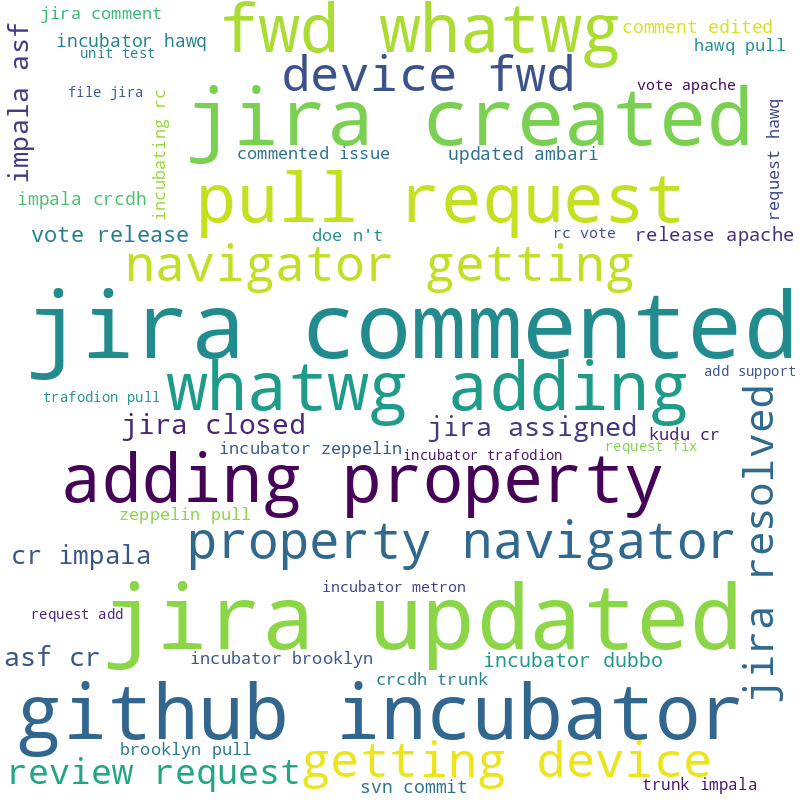

In [13]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ' '.join([str(x) for x in titles_graduated])
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue',
                    #stopwords=stopwords.words('english').append(mystopwords),
                    width = 800, height= 800 )
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [14]:
gc.collect()

0

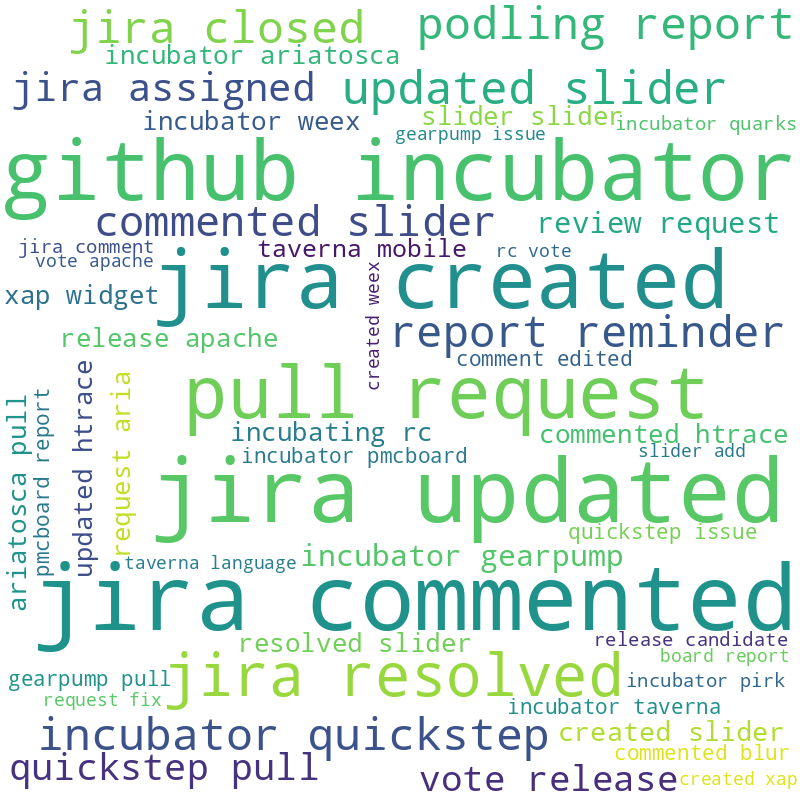

In [15]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ' '.join([str(x) for x in titles_retired])
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue',
                    #stopwords=stopwords.words('english').append(mystopwords),
                    width = 800, height= 800 )
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [16]:
gc.collect()

0

## Analysis
+ TF-IDF on graduated titles

In [10]:
from gensim import corpora

texts = [str(x).split() for x in titles_graduated]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [11]:
from gensim import models

tfidf = models.TfidfModel(corpus)
tfidf.save("./title_graduated_model.tfidf")
model_graduated_title_tfidf = models.TfidfModel.load("./title_graduated_model.tfidf")

In [19]:
texts[1]

['fyi', 'uima', 'tc', 'work', 'started', 'oasis']

In [20]:
corpus[1]

[(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]

In [21]:
sorted(model_graduated_title_tfidf[corpus[1]], key= lambda x: x[1], reverse= True)

[(3, 0.5811687284465828),
 (5, 0.44284300379896707),
 (2, 0.4297385232538691),
 (6, 0.33903826431837497),
 (4, 0.3248928542788109),
 (7, 0.2468916224990734)]

In [22]:
def get_keywords_based_on_tfidf(tfidf, dictionary, content, topN=0):
    tfidf_map = tfidf[content]
    # sort words in each document by tf-idf value
    keywords = sorted(tfidf_map, key=lambda x: x[1], reverse=True)
    if topN!=0 :
        keywords = keywords[:topN]
    keywords = list(map(lambda x: dictionary[x[0]], keywords))
    return keywords

In [23]:
get_keywords_based_on_tfidf(model_graduated_title_tfidf, dictionary, corpus[1])

['oasis', 'tc', 'fyi', 'uima', 'started', 'work']

In [24]:
gc.collect()

0

+ Check all words in all emails of graduated

In [25]:
all_topics = []
for cop in tqdm(corpus):
    all_topics.extend(get_keywords_based_on_tfidf(model_graduated_title_tfidf, dictionary, cop))
gc.collect()

100%|██████████| 1249240/1249240 [00:47<00:00, 26304.62it/s]


0

In [26]:
result = pd.value_counts(all_topics)
print(result[:21])

jira         445846
commented    132408
updated      120057
request      115119
created       93570
github        85619
property      71910
adding        70989
getting       69681
fwd           67900
pull          65323
device        64568
navigator     63745
whatwg        63716
add           57839
-             55430
release       48605
apache        48126
review        47057
support       45346
resolved      44226
dtype: int64


In [27]:
type(result)

pandas.core.series.Series

<BarContainer object of 21 artists>

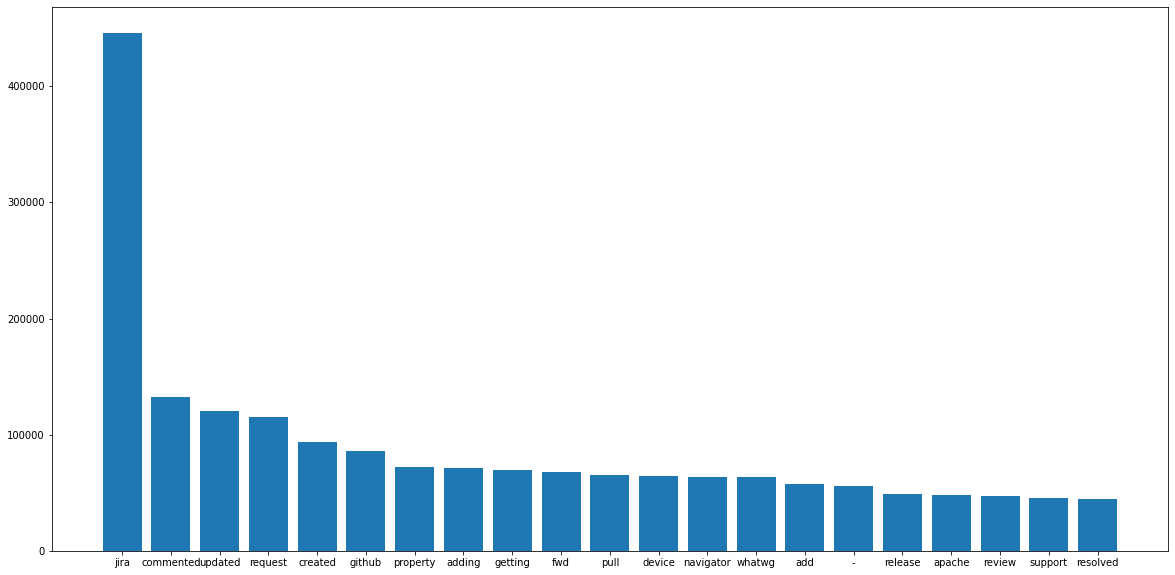

In [28]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(20, 10))
plt.bar( result[:21].index, result[:21].values )

#plt.show()

In [12]:
from gensim import corpora

texts = [str(x).split() for x in titles_retired]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

from gensim import models

tfidf = models.TfidfModel(corpus)
tfidf.save("./title_retired_model.tfidf")
model_retired_title_tfidf = models.TfidfModel.load("./title_retired_model.tfidf")
gc.collect()

0

In [13]:
def get_keywords_based_on_tfidf(tfidf, dictionary, content, topN=0):
    tfidf_map = tfidf[content]
    # sort words in each document by tf-idf value
    keywords = sorted(tfidf_map, key=lambda x: x[1], reverse=True)
    if topN!=0 :
        keywords = keywords[:topN]
    keywords = list(map(lambda x: dictionary[x[0]], keywords))
    return keywords

In [14]:
all_topics = []
for cop in tqdm(corpus):
    all_topics.extend(get_keywords_based_on_tfidf(model_retired_title_tfidf, dictionary, cop))
gc.collect()
result = pd.value_counts(all_topics)
print(result[:21])

100%|██████████| 109400/109400 [00:03<00:00, 27511.87it/s]


jira              41624
github            13615
request           11440
commented         11172
updated           10490
pull               9539
created            9106
slider-            7058
release            6590
-                  6331
add                5991
issue              5742
report             5310
apache             5290
resolved           4853
support            4538
vote               4349
incubator-weex     4021
fix                3358
test               3108
build              2972
dtype: int64


<BarContainer object of 21 artists>

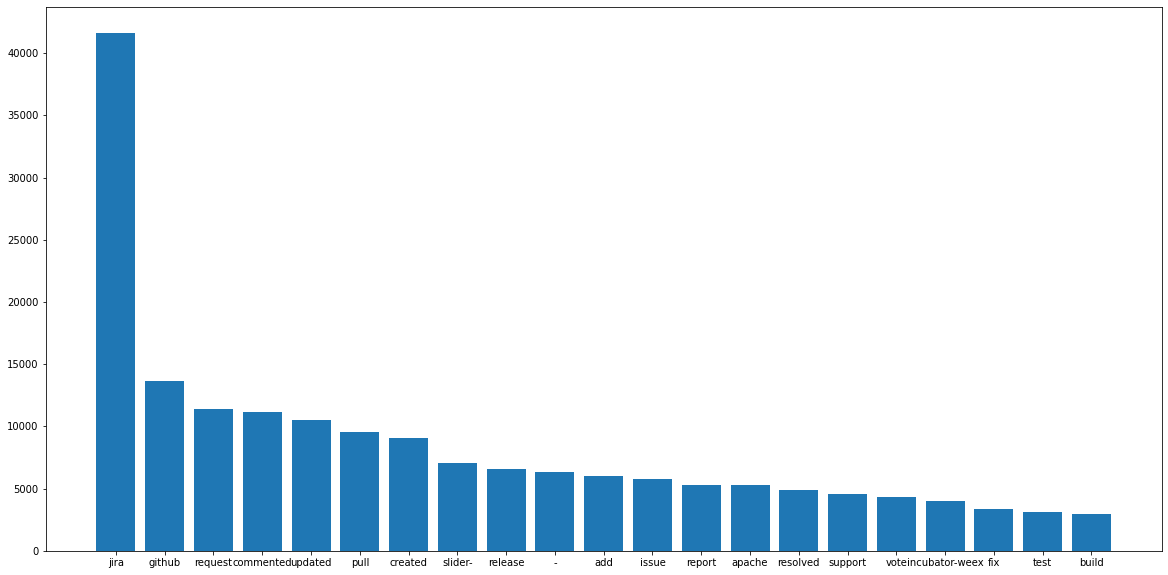

In [15]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(20, 10))
plt.bar( result[:21].index, result[:21].values )

#plt.show()

In [19]:
texts = [str(x).split() for x in bodys_retired]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

tfidf = models.TfidfModel(corpus)
tfidf.save("./body_retired_model.tfidf")
model_retired_body_tfidf = models.TfidfModel.load("./body_retired_model.tfidf")
gc.collect()

0

In [20]:
all_topics = []
for cop in tqdm(corpus):
    all_topics.extend(get_keywords_based_on_tfidf(model_retired_body_tfidf, dictionary, cop))
gc.collect()
result = pd.value_counts(all_topics)
print(result[:21])

100%|██████████| 109400/109400 [00:39<00:00, 2778.64it/s]


--          90488
-           89502
project     70704
issue       62242
wa          56589
message     56579
jira        56282
type        46613
key         46358
sent        45770
url         44128
reporter    40346
wrote       36102
please      34165
version     33408
file        31903
v           31219
doe         31201
n't         30917
see         30407
need        30193
dtype: int64


<BarContainer object of 21 artists>

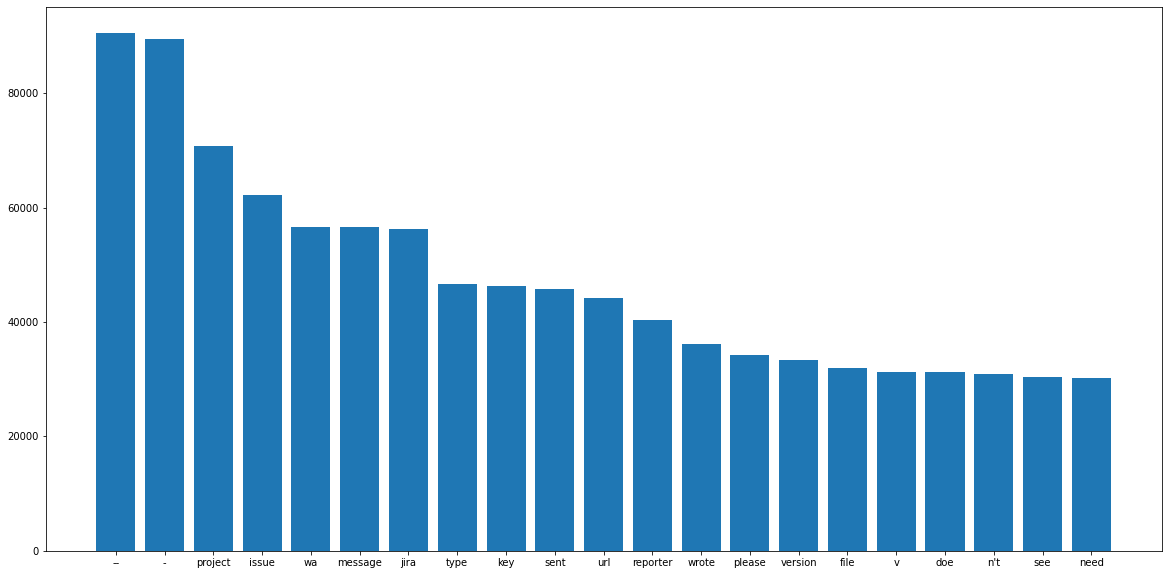

In [21]:
plt.figure(figsize=(20, 10))
plt.bar( result[:21].index, result[:21].values )

In [22]:
texts = [str(x).split() for x in bodys_graduated]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

tfidf = models.TfidfModel(corpus)
tfidf.save("./body_graduated_model.tfidf")
model_graduated_body_tfidf = models.TfidfModel.load("./body_graduated_model.tfidf")
gc.collect()

0

In [23]:
all_topics = []
for cop in tqdm(corpus):
    all_topics.extend(get_keywords_based_on_tfidf(model_graduated_body_tfidf, dictionary, cop))
gc.collect()
result = pd.value_counts(all_topics)
print(result[:21])

100%|██████████| 1367546/1367546 [09:24<00:00, 2422.19it/s]


--           1093227
-            1060688
project       733282
message       716015
issue         689239
wa            665484
jira          661547
type          606564
key           581470
url           577377
sent          548695
reporter      536257
wrote         415463
version       406104
see           397662
component     390430
n't           383599
think         371274
please        366669
file          363839
's            362440
dtype: int64


<BarContainer object of 21 artists>

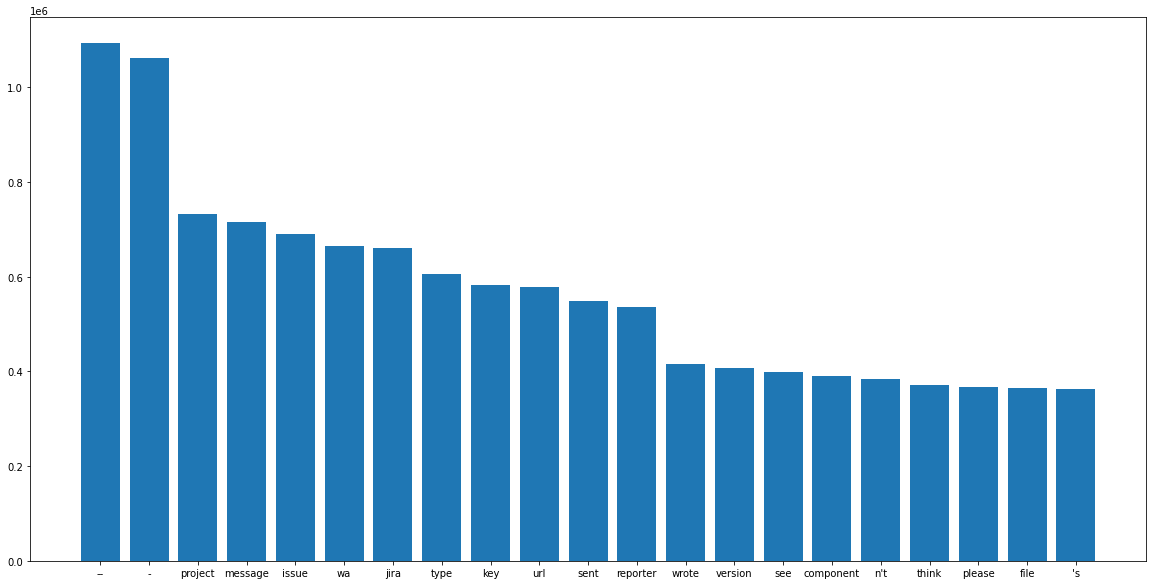

In [24]:
plt.figure(figsize=(20, 10))
plt.bar( result[:21].index, result[:21].values )

In [1]:
import nltk

EXAMPLE_TEXT = "Hello World! Isn't it good to see you? Thanks for buying this book."
sentences = nltk.sent_tokenize(EXAMPLE_TEXT)
print(sentences)  # 分句
tokens = nltk.word_tokenize(EXAMPLE_TEXT)
print(tokens)  # 分词

['Hello World!', "Isn't it good to see you?", 'Thanks for buying this book.']
['Hello', 'World', '!', 'Is', "n't", 'it', 'good', 'to', 'see', 'you', '?', 'Thanks', 'for', 'buying', 'this', 'book', '.']


In [33]:

import nltk
nltk.download('averaged_perceptron_tagger')

#EXAMPLE_TEXT = "Hello World! Isn't it good to see you? Thanks for buying this book."

EXAMPLE_TEXT = "thanks mark. i will try this.\n\nankur\n\non tue, feb ,  at : pm, mark struberg struberg.de wrote:\n\n hi ankur!\n\n you can basically validate any pojo which has a jsr- annotation on it.\n prominent examples of that being jpa entities, jsf backing beans, etc.\n\n for getting into it i suggest to first checkout the sources\n\n  svn co  bval\n\n now build it with maven  by simply going into 'cd bval' and invoking\n\n  mvn clean install\n\n voila! you now have a self compiled bval-.-incubating-snapshot in your\n local ~.mrepository...\n\n as examples for beans which get validated please see the classes in\n .bval-jsrsrctestjavaorgapachebvaljsrexample\n\n feel free to ping us back if you need more or have any detailed questions!\n\n liegrue,\n strub\n\n\n  http:maven.apache.org\n\n --- on tue, , ankur garg ankurgarg.ism.com wrote:\n\n from: ankur garg ankurgarg.ism.com\n subject: regarding using or debugging beanvalidator\n to: bval-user.apache.org bval-user.apache.org\n date: tuesday, february , , : am\n\n hi,\n i am new to this project, can you help me with sample source or any\n document which can help me run beanvalidator and setup a debug environment\n for the project. i want to contribute by fixing bugs in the project. any\n help will be great.\n\n\n i am trying to use following sample code:\n package com;\n import javax.validation.validation;import javax.validation.validator;\n import javax.validation.validatorfactory;\n import org.apache.bval.jsr.apachevalidationprovider;\n public enum myvalidatorfactory {\n     single_instance     {            validatorfactory avf =\n validation.byproviderapachevalidationprovider.class.configure.buildvalidatorfactory;\n              \n         public validator getvalidator {            return\n avf.getvalidator;        }            };        public abstract validator\n getvalidator;\n }\n i am not sure what sort of java bean i can validate, please help.\n thanks,ankur\n\n\n\n\n\n"

sents = nltk.sent_tokenize(EXAMPLE_TEXT)
tokens = nltk.word_tokenize(sents[4])
tagged = nltk.pos_tag(tokens)
print(tagged[0:10])  # 词性标注

[('prominent', 'JJ'), ('examples', 'NNS'), ('of', 'IN'), ('that', 'DT'), ('being', 'VBG'), ('jpa', 'JJ'), ('entities', 'NNS'), (',', ','), ('jsf', 'NN'), ('backing', 'NN')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/orzwang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [46]:
sents[4]

'prominent examples of that being jpa entities, jsf backing beans, etc.'

In [37]:
from nltk import WordNetLemmatizer

lemma = WordNetLemmatizer()
lemma.lemmatize('.','')

KeyError: ''

In [41]:
if not(''):
    print(False)

False


In [ ]:
# Should be used in real txts of emails
doc_topics = []
for cop in tqdm(corpus):
    doc_topics.extend(get_keywords_based_on_tfidf(model_graduated_title_tfidf, dictionary, cop))
doc_topics = pd.DataFrame(doc_topics).T
result = doc_topics.apply(pd.value_counts)
print(result)